<a href="https://colab.research.google.com/github/AsiaAlrashed/DL-DS-ML/blob/main/Sentiment%20analysis%20for%20reddit%20posts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [7]:
df = pd.read_csv("sample.csv")
df.head(3)

,Unnamed: 0,body,sentiment,score
0,0,Yeah but what the above commenter is saying is...,0.5719,2
1,1,Any comparison of efficiency between solar and...,-0.9877,2
2,2,I'm honestly waiting for climate change and th...,-0.1143,1


In [3]:
df.shape

(10000, 4)

In [4]:
df.columns

Index(['Unnamed: 0', 'body', 'sentiment', 'score'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   body        10000 non-null  object 
 2   sentiment   9803 non-null   float64
 3   score       10000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 312.6+ KB


In [20]:
df.describe()

,id,sentiment,score,Text Length
count,9803.000000,9803.000000,9803.000000,9803.000000
mean,5001.153830,-0.039246,12.056717,56.646843
std,2883.496759,0.636755,93.988481,79.359037
min,0.000000,-0.999700,-229.000000,2.000000
25%,2512.500000,-0.636900,1.000000,16.000000
50%,5000.000000,0.000000,2.000000,31.000000
75%,7489.500000,0.542300,5.000000,64.000000
max,9999.000000,0.999800,6439.000000,982.000000


In [6]:
df.duplicated().sum()

0

**Text** **processing** (**body**)

clean text

In [8]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [9]:
df['cleaned_body'] = df['body'].apply(clean_text)

# Display the cleaned DataFrame
df[['body', 'cleaned_body']].head(2)

,body,cleaned_body
0,Yeah but what the above commenter is saying is...,Yeah but what the above commenter is saying is...
1,Any comparison of efficiency between solar and...,Any comparison of efficiency between solar and...


Tokenization: Split the text into words or tokens


In [10]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')
#تقسيم النص الى كلمات
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization
df['tokens'] = df['cleaned_body'].apply(tokenize_text)

# Display the tokens
df[['cleaned_body', 'tokens']].head(2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,cleaned_body,tokens
0,Yeah but what the above commenter is saying is...,"[Yeah, but, what, the, above, commenter, is, s..."
1,Any comparison of efficiency between solar and...,"[Any, comparison, of, efficiency, between, sol..."


Stop Words Removal: Eliminate common words that don't contribute to sentiment, like "and", "the", etc.

In [11]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stop_words(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Apply stop words removal
df['filtered_tokens'] = df['tokens'].apply(remove_stop_words)

# Display the filtered tokens
df[['tokens', 'filtered_tokens']].head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tokens,filtered_tokens
0,"[Yeah, but, what, the, above, commenter, is, s...","[Yeah, commenter, saying, base, doesnt, want, ..."
1,"[Any, comparison, of, efficiency, between, sol...","[comparison, efficiency, solar, fossil, fuels,..."


Lemmatization/Stemming: Convert words to their base form.

In [12]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lemmatize_tokens)

# Display the lemmatized tokens
df[['filtered_tokens', 'lemmatized_tokens']].head(2)

[nltk_data] Downloading package wordnet to /root/nltk_data...


,filtered_tokens,lemmatized_tokens
0,"[Yeah, commenter, saying, base, doesnt, want, ...","[Yeah, commenter, saying, base, doesnt, want, ..."
1,"[comparison, efficiency, solar, fossil, fuels,...","[comparison, efficiency, solar, fossil, fuel, ..."


Extract feature from text  -> text length

In [13]:
#Create Text Length Column
df['Text Length'] = df['lemmatized_tokens'].apply(len)

# Display the DataFrame with the new Text Length column
df_ = df[['body',"sentiment", 'lemmatized_tokens', 'Text Length']]
df_.head(3)

,body,sentiment,lemmatized_tokens,Text Length
0,Yeah but what the above commenter is saying is...,0.5719,"[Yeah, commenter, saying, base, doesnt, want, ...",25
1,Any comparison of efficiency between solar and...,-0.9877,"[comparison, efficiency, solar, fossil, fuel, ...",153
2,I'm honestly waiting for climate change and th...,-0.1143,"[Im, honestly, waiting, climate, change, impac...",33


**Processing** **the** **column** **of** **sentiment**  -> delete null value

In [14]:
sentiment_null = df_[df_['sentiment'].isna()]
sentiment_null.head(3)

,body,sentiment,lemmatized_tokens,Text Length
25,Damn that climate change,NaN,"[Damn, climate, change]",3
28,Climate Change,NaN,"[Climate, Change]",2
65,Racist! Semi-Fascist! Climate change! Reeeeeee...,NaN,"[Racist, SemiFascist, Climate, change, Reeeeee...",5


In [15]:
sentiment_txt = sentiment_null[["lemmatized_tokens"]]
sentiment_txt.to_csv("sentiment_null.txt", sep="\t", index=False)

The text corresponding to the null sentiment column contains meaningless words or random characters, so I will delete the lines that contain null values ​​in this column.


In [16]:
df.head(1)

,Unnamed: 0,body,sentiment,score,cleaned_body,tokens,filtered_tokens,lemmatized_tokens,Text Length
0,0,Yeah but what the above commenter is saying is...,0.5719,2,Yeah but what the above commenter is saying is...,"[Yeah, but, what, the, above, commenter, is, s...","[Yeah, commenter, saying, base, doesnt, want, ...","[Yeah, commenter, saying, base, doesnt, want, ...",25


In [17]:
df = df.dropna(subset=['sentiment'])

In [18]:
df.rename(columns={"Unnamed: 0": "id"}, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9803 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9803 non-null   int64  
 1   body               9803 non-null   object 
 2   sentiment          9803 non-null   float64
 3   score              9803 non-null   int64  
 4   cleaned_body       9803 non-null   object 
 5   tokens             9803 non-null   object 
 6   filtered_tokens    9803 non-null   object 
 7   lemmatized_tokens  9803 non-null   object 
 8   Text Length        9803 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 765.9+ KB


In [21]:
df.describe()

,id,sentiment,score,Text Length
count,9803.000000,9803.000000,9803.000000,9803.000000
mean,5001.153830,-0.039246,12.056717,56.646843
std,2883.496759,0.636755,93.988481,79.359037
min,0.000000,-0.999700,-229.000000,2.000000
25%,2512.500000,-0.636900,1.000000,16.000000
50%,5000.000000,0.000000,2.000000,31.000000
75%,7489.500000,0.542300,5.000000,64.000000
max,9999.000000,0.999800,6439.000000,982.000000


In [19]:
df.head(5)

,id,body,sentiment,score,cleaned_body,tokens,filtered_tokens,lemmatized_tokens,Text Length
0,0,Yeah but what the above commenter is saying is...,0.5719,2,Yeah but what the above commenter is saying is...,"[Yeah, but, what, the, above, commenter, is, s...","[Yeah, commenter, saying, base, doesnt, want, ...","[Yeah, commenter, saying, base, doesnt, want, ...",25
1,1,Any comparison of efficiency between solar and...,-0.9877,2,Any comparison of efficiency between solar and...,"[Any, comparison, of, efficiency, between, sol...","[comparison, efficiency, solar, fossil, fuels,...","[comparison, efficiency, solar, fossil, fuel, ...",153
2,2,I'm honestly waiting for climate change and th...,-0.1143,1,Im honestly waiting for climate change and the...,"[Im, honestly, waiting, for, climate, change, ...","[Im, honestly, waiting, climate, change, impac...","[Im, honestly, waiting, climate, change, impac...",33
3,3,Not just Sacramento. It's actually happening a...,0.0000,4,Not just Sacramento Its actually happening all...,"[Not, just, Sacramento, Its, actually, happeni...","[Sacramento, actually, happening, world, Clima...","[Sacramento, actually, happening, world, Clima...",8
4,4,I think climate change tends to get some peopl...,0.6634,1,I think climate change tends to get some peopl...,"[I, think, climate, change, tends, to, get, so...","[think, climate, change, tends, get, people, r...","[think, climate, change, tends, get, people, r...",35


In [28]:
def classify_value(x):
    if -1 <= x < -0.6:
        return 'super_negative'

    elif -0.6 <= x < -0.1:
        return 'negative'

    elif -0.1 <= x < 0.1:
        return 'neutral'

    elif 0.1 <= x < 0.6:
        return 'positive'

    elif 0.6 <= x <= 1:
        return 'super_positive'

    else:
        return 'out_of_range'


df['classify'] = df['sentiment'].apply(classify_value)

In [29]:
df.head(2)

,id,body,sentiment,score,cleaned_body,tokens,filtered_tokens,lemmatized_tokens,Text Length,classify
0,0,Yeah but what the above commenter is saying is...,0.5719,2,Yeah but what the above commenter is saying is...,"[Yeah, but, what, the, above, commenter, is, s...","[Yeah, commenter, saying, base, doesnt, want, ...","[Yeah, commenter, saying, base, doesnt, want, ...",25,positive
1,1,Any comparison of efficiency between solar and...,-0.9877,2,Any comparison of efficiency between solar and...,"[Any, comparison, of, efficiency, between, sol...","[comparison, efficiency, solar, fossil, fuels,...","[comparison, efficiency, solar, fossil, fuel, ...",153,super_negative


<ipython-input-30-b2c526d7aace>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classify', data=df,palette="flare")


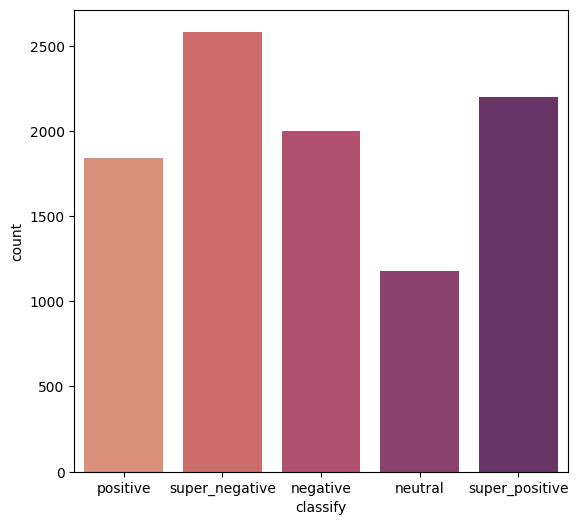

In [30]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.countplot(x='classify', data=df,palette="flare")
plt.show()

<ipython-input-31-50977e8598d9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


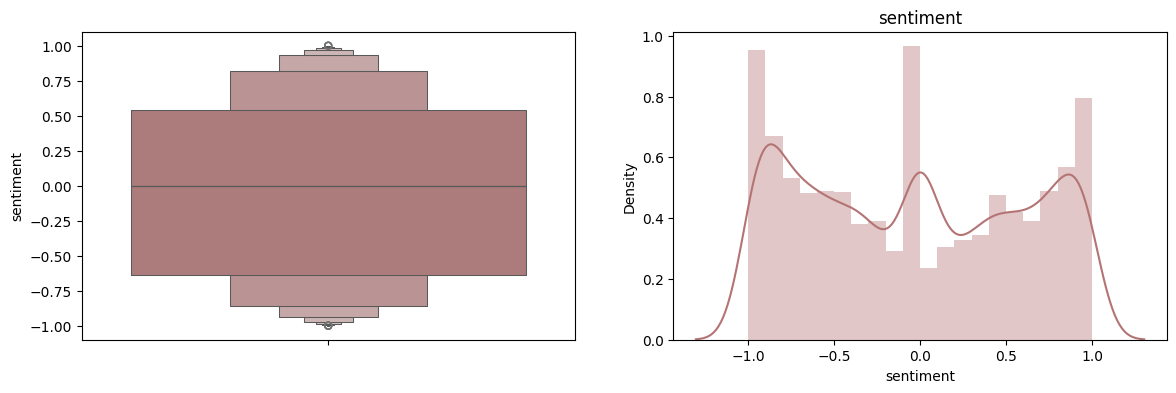

In [31]:
def plots(plot):
    plt.figure(figsize=(14, 6)).set_figheight(4)
    plt.subplot(1,2,1)
    sns.boxenplot(df[plot],color ="#b47474")
    plt.subplot(1,2,2)
    sns.distplot(df[plot], bins=20,color ="#b47474")
    plt.title(plot)
    plt.show()
plots("sentiment")

<ipython-input-31-50977e8598d9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


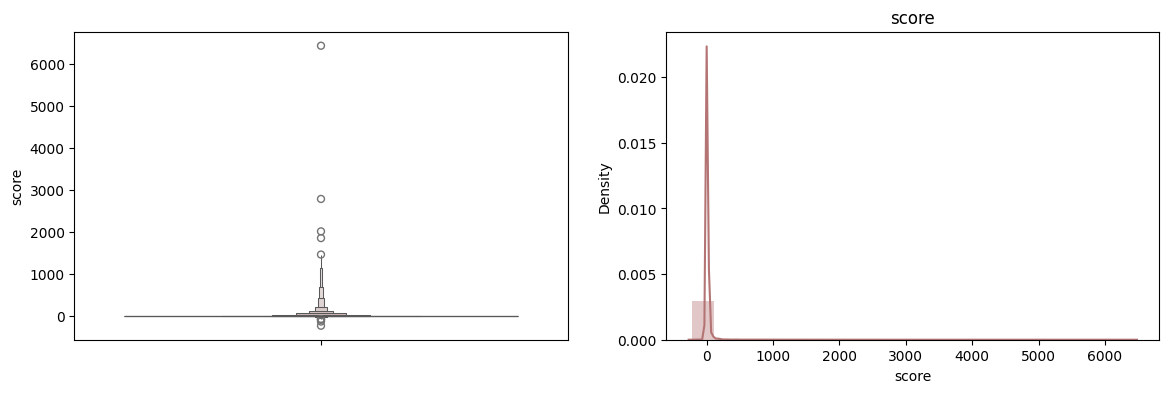

In [32]:
plots("score")

<ipython-input-31-50977e8598d9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


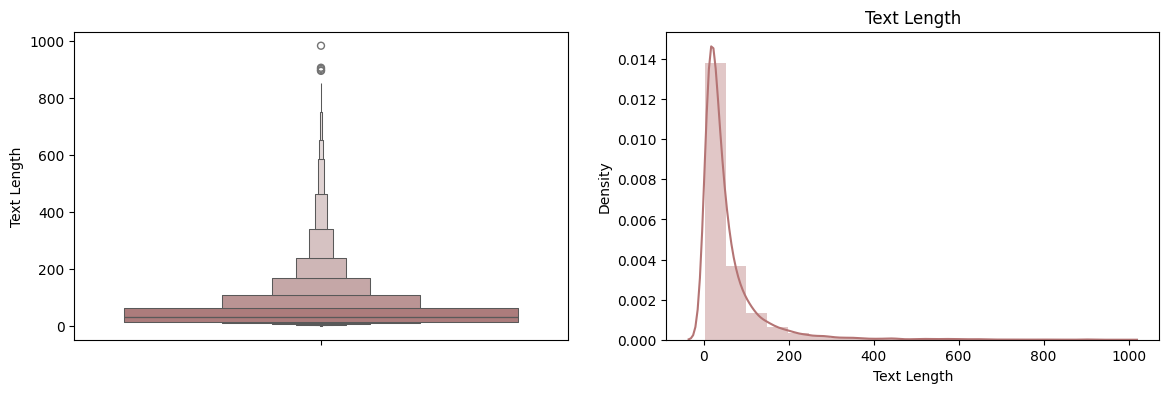

In [33]:
plots("Text Length")

<Axes: >

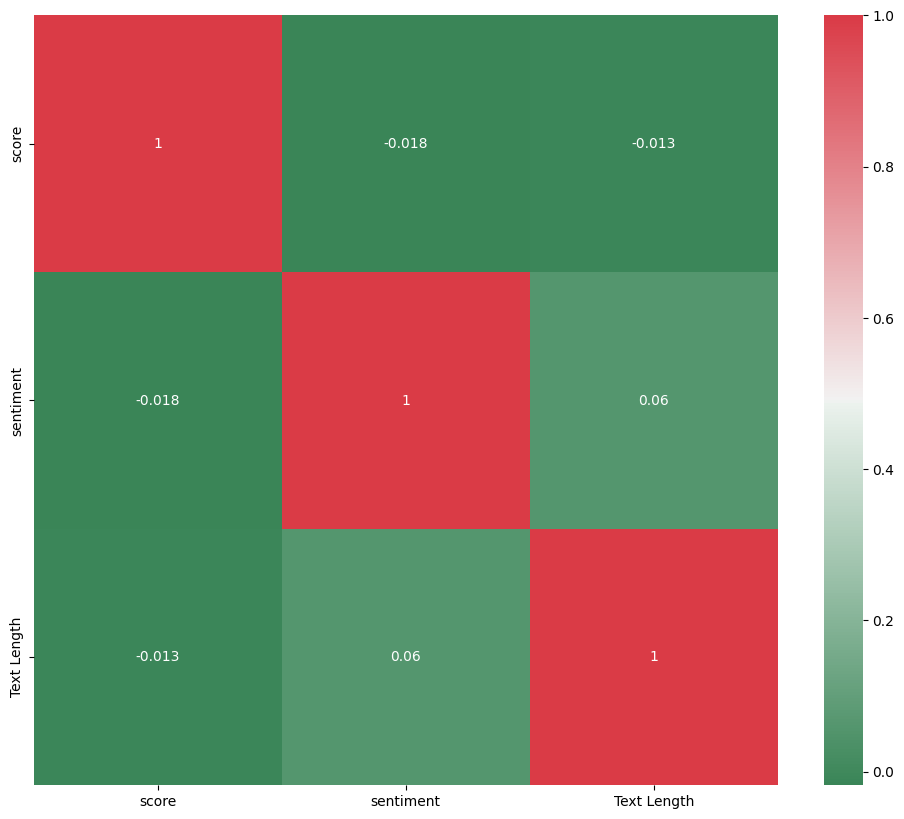

In [36]:
df1 = df[["score", "sentiment", "Text Length"]]
fig = plt.figure(figsize=(12,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(df1.corr(), cmap=cmap, annot=True)